In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
path = os.getcwd()
df = pd.read_csv(path+'/Data/df_waittime.csv')

#### 1. Show statistical differences between 1, 2, 4 and 8 servers
With $\mu = 1$, $\rho = 0.75$ and therefore $\lambda = [0.75,\ 1.5,\ 3]$ respectively.

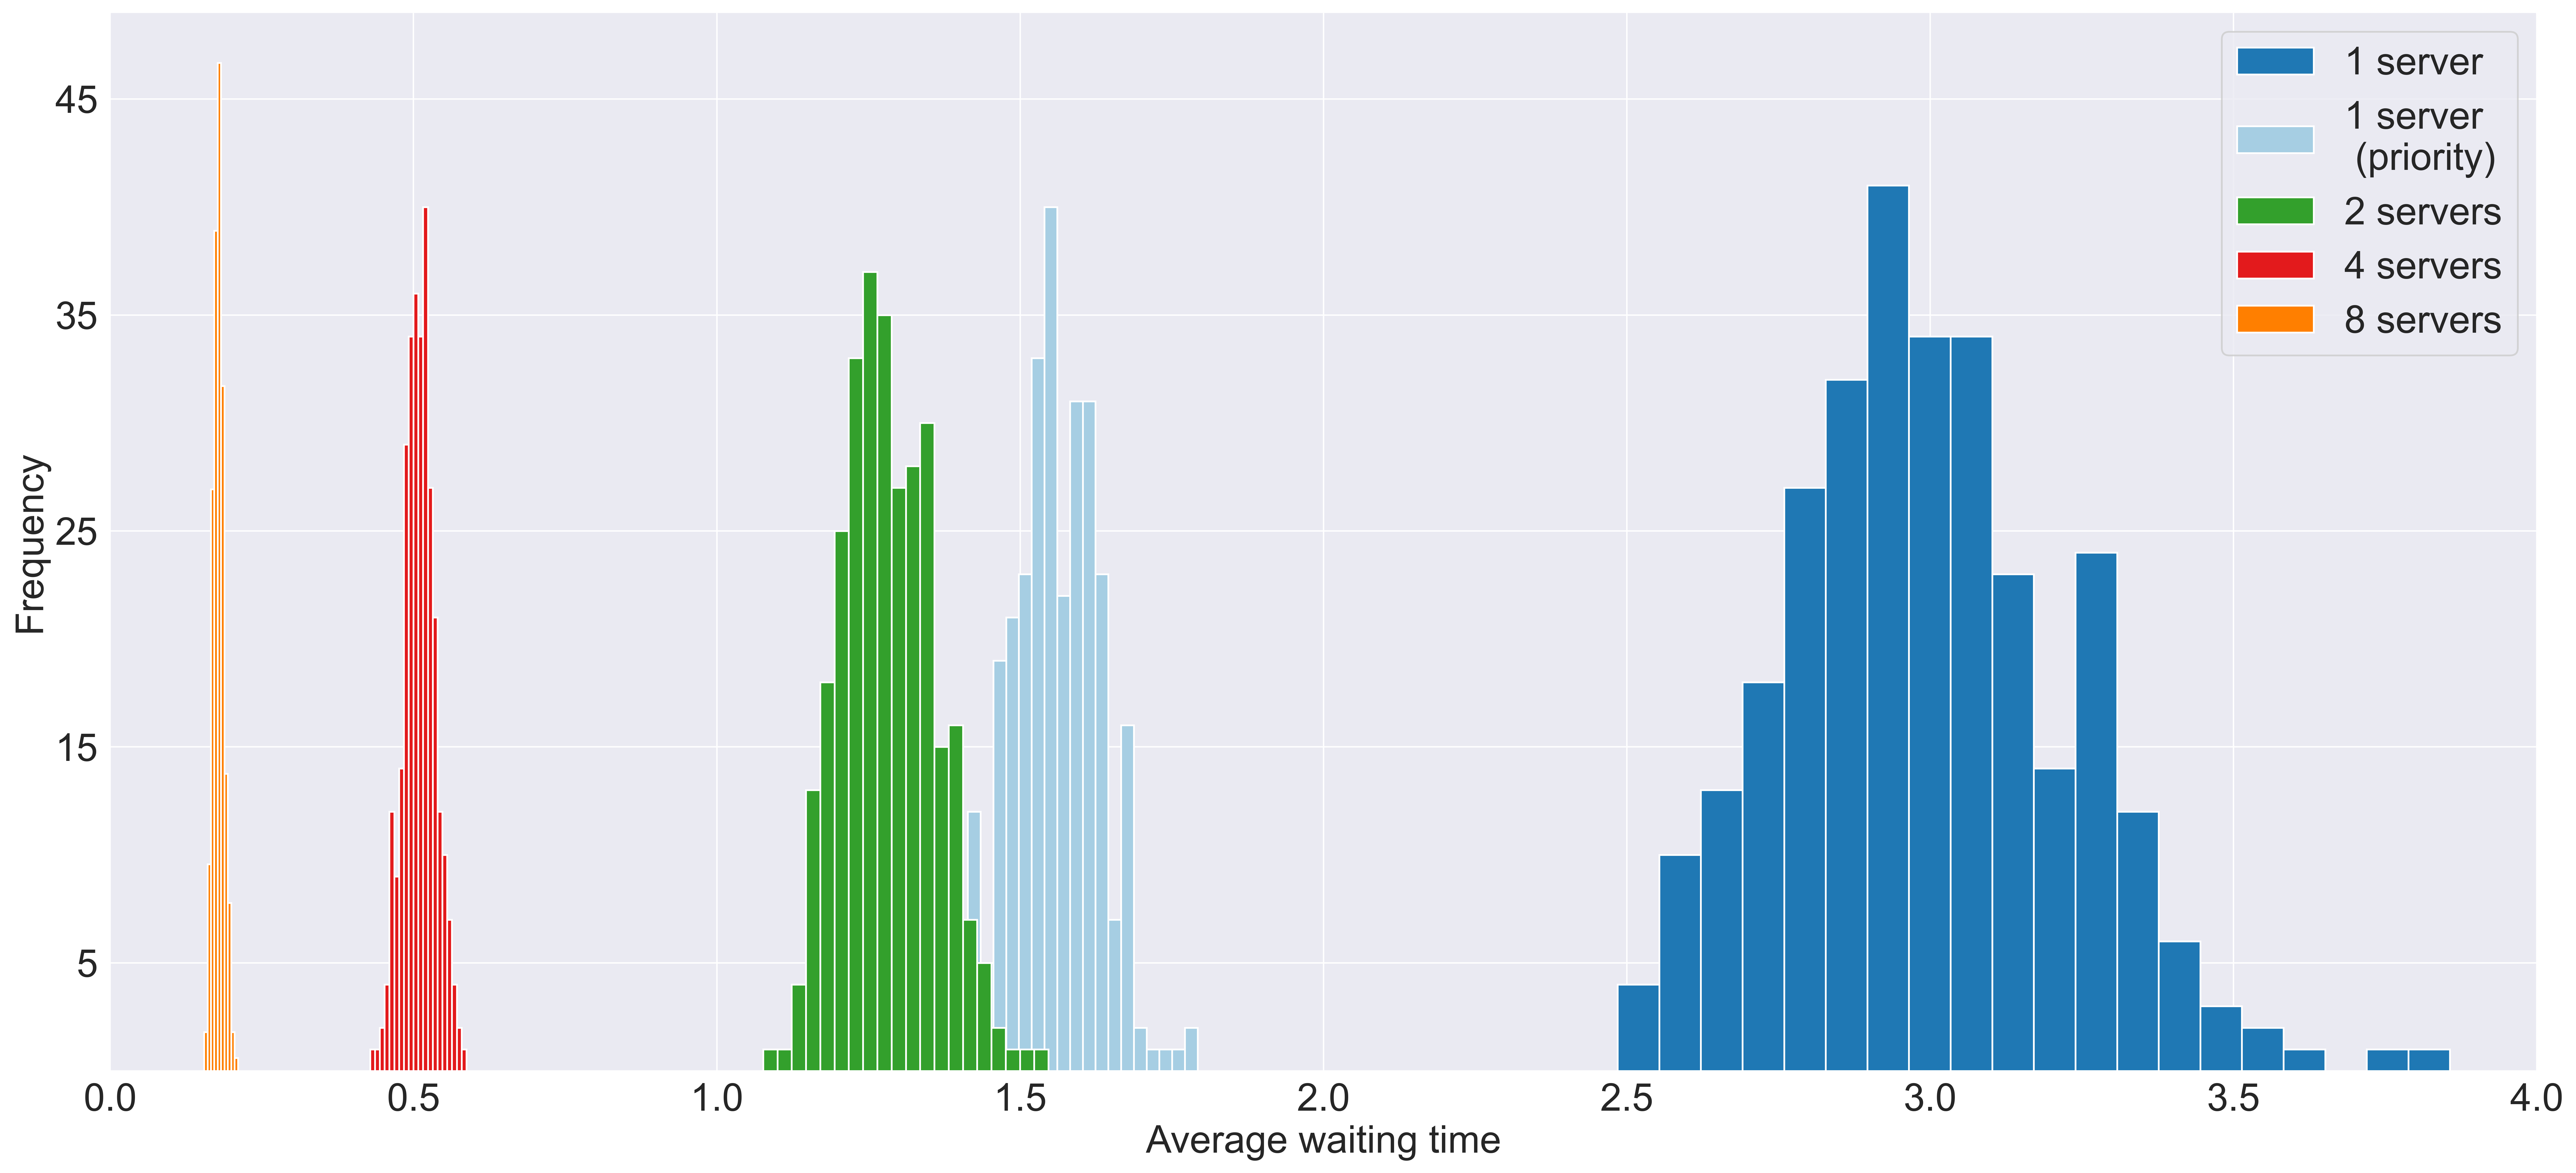

In [2]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(1, figsize=(20,9),dpi=500)
fig.tight_layout()     
palette = sns.color_palette("Paired")

#Plot histograms
axs.hist(df["('exp', 1, 0.75)"],bins=20,color=palette[1],label='1 server')
axs.hist(df["('priority', 1, 0.75)"],bins=20,color=palette[0],label='1 server \n (priority)')
axs.hist(df["('exp', 2, 0.75)"],bins=20,color=palette[3],label='2 servers')
axs.hist(df["('exp', 4, 0.75)"],bins=20,color=palette[5],label='4 servers')
axs.hist(df["('exp', 8, 0.75)"],bins=10,density=True,color=palette[7],label='8 servers')

#Edit axis and labels etc.
axs.set_xlabel(r'Average waiting time', fontsize=22)
axs.set_ylabel(r'Frequency', fontsize=22)
axs.set_yticks(np.arange(5,50,10))
axs.set_yticklabels(np.round(np.arange(5,50,10)), fontsize=22)
axs.set_xticklabels(np.arange(0,5,0.5), fontsize=22)
axs.set_xlim((0,4))
axs.legend(fontsize=22,loc='upper right',ncol=1)
plt.show()
fig.savefig(path+'/Figures/servers_hist.pdf',dpi=300)


#### 2. Calculate t-statistics and visualise over varying $\rho$
Also plot means and corresponding confidence interval $(2\sigma)$

T-statistic with rho = 0.75, comparing 1 server with and without priority queue: 103.1259034058832
T-statistic with rho = 0.75, comparing 1 and 2 servers: 122.43540211258151
T-statistic with rho = 0.75, comparing 1 and 4 servers: 186.3466505829412
T-statistic with rho = 0.75, comparing 1 and 8 servers: 212.38146492356722
T-statistic with rho = 0.9, comparing 1 server with and without priority queue: 71.14894734389296
T-statistic with rho = 0.9, comparing 1 and 2 servers: 55.77388865541657
T-statistic with rho = 0.9, comparing 1 and 4 servers: 87.4836944559178
T-statistic with rho = 0.9, comparing 1 and 8 servers: 101.94955602691051


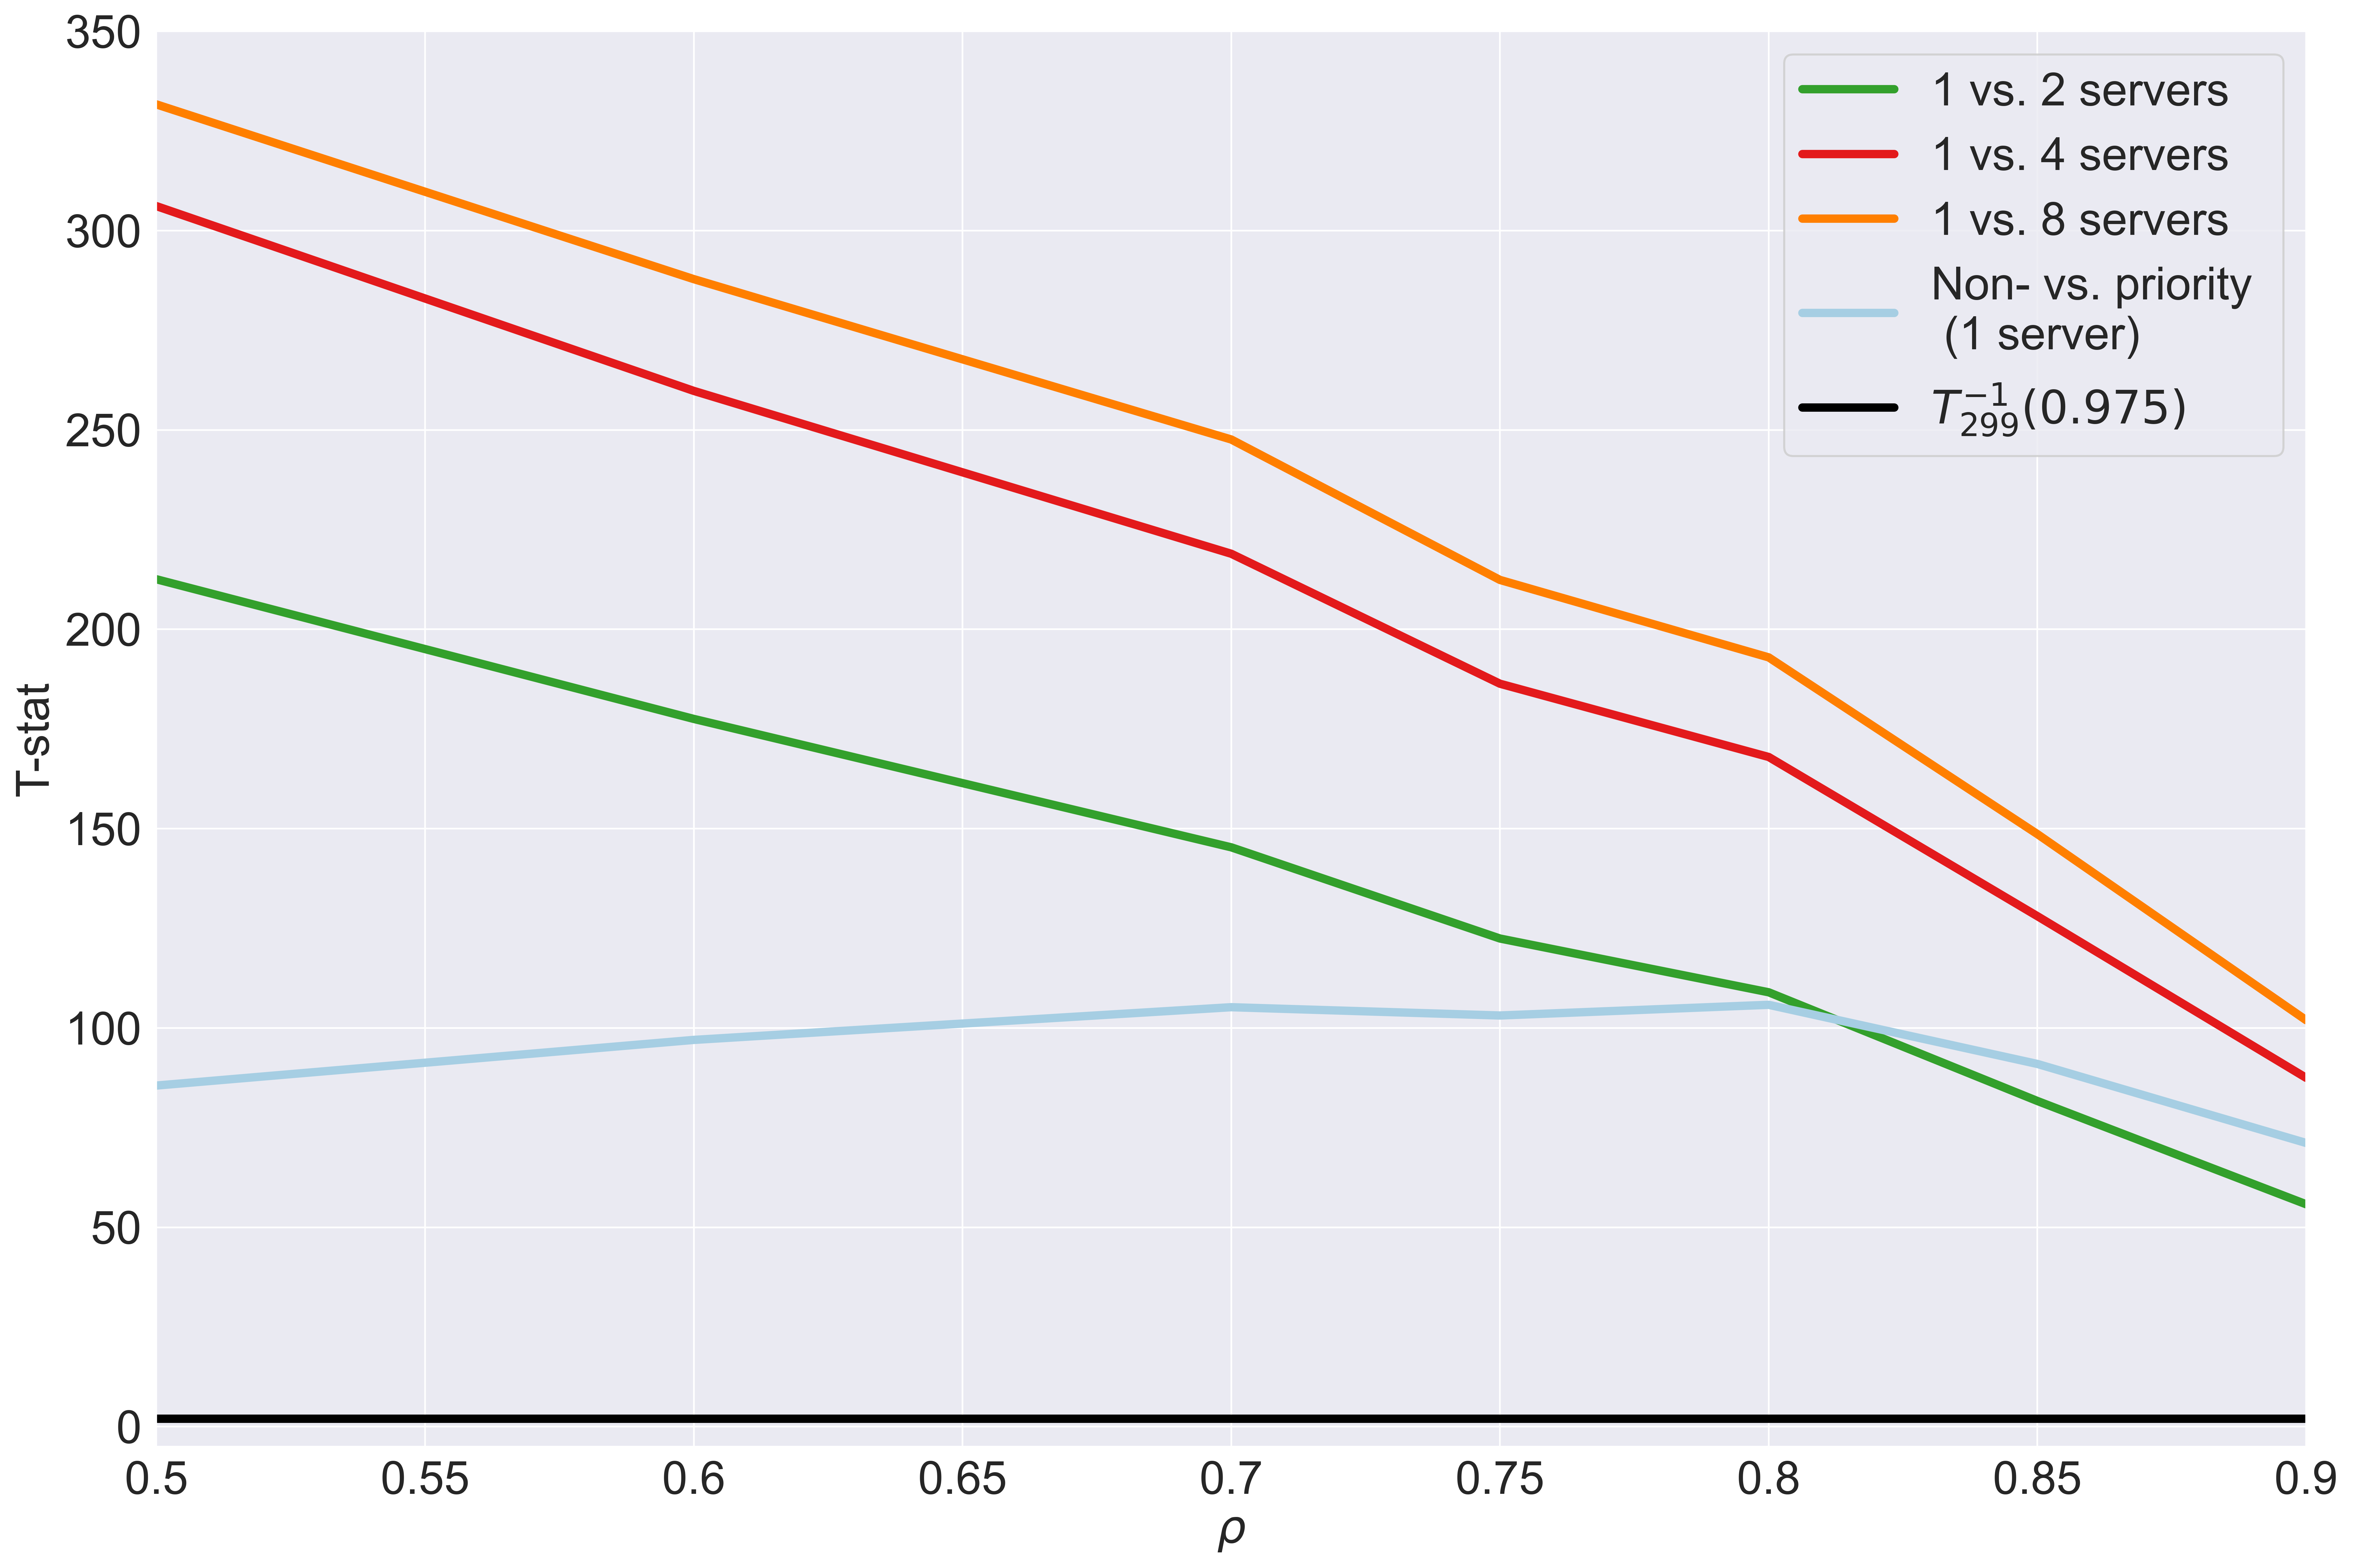

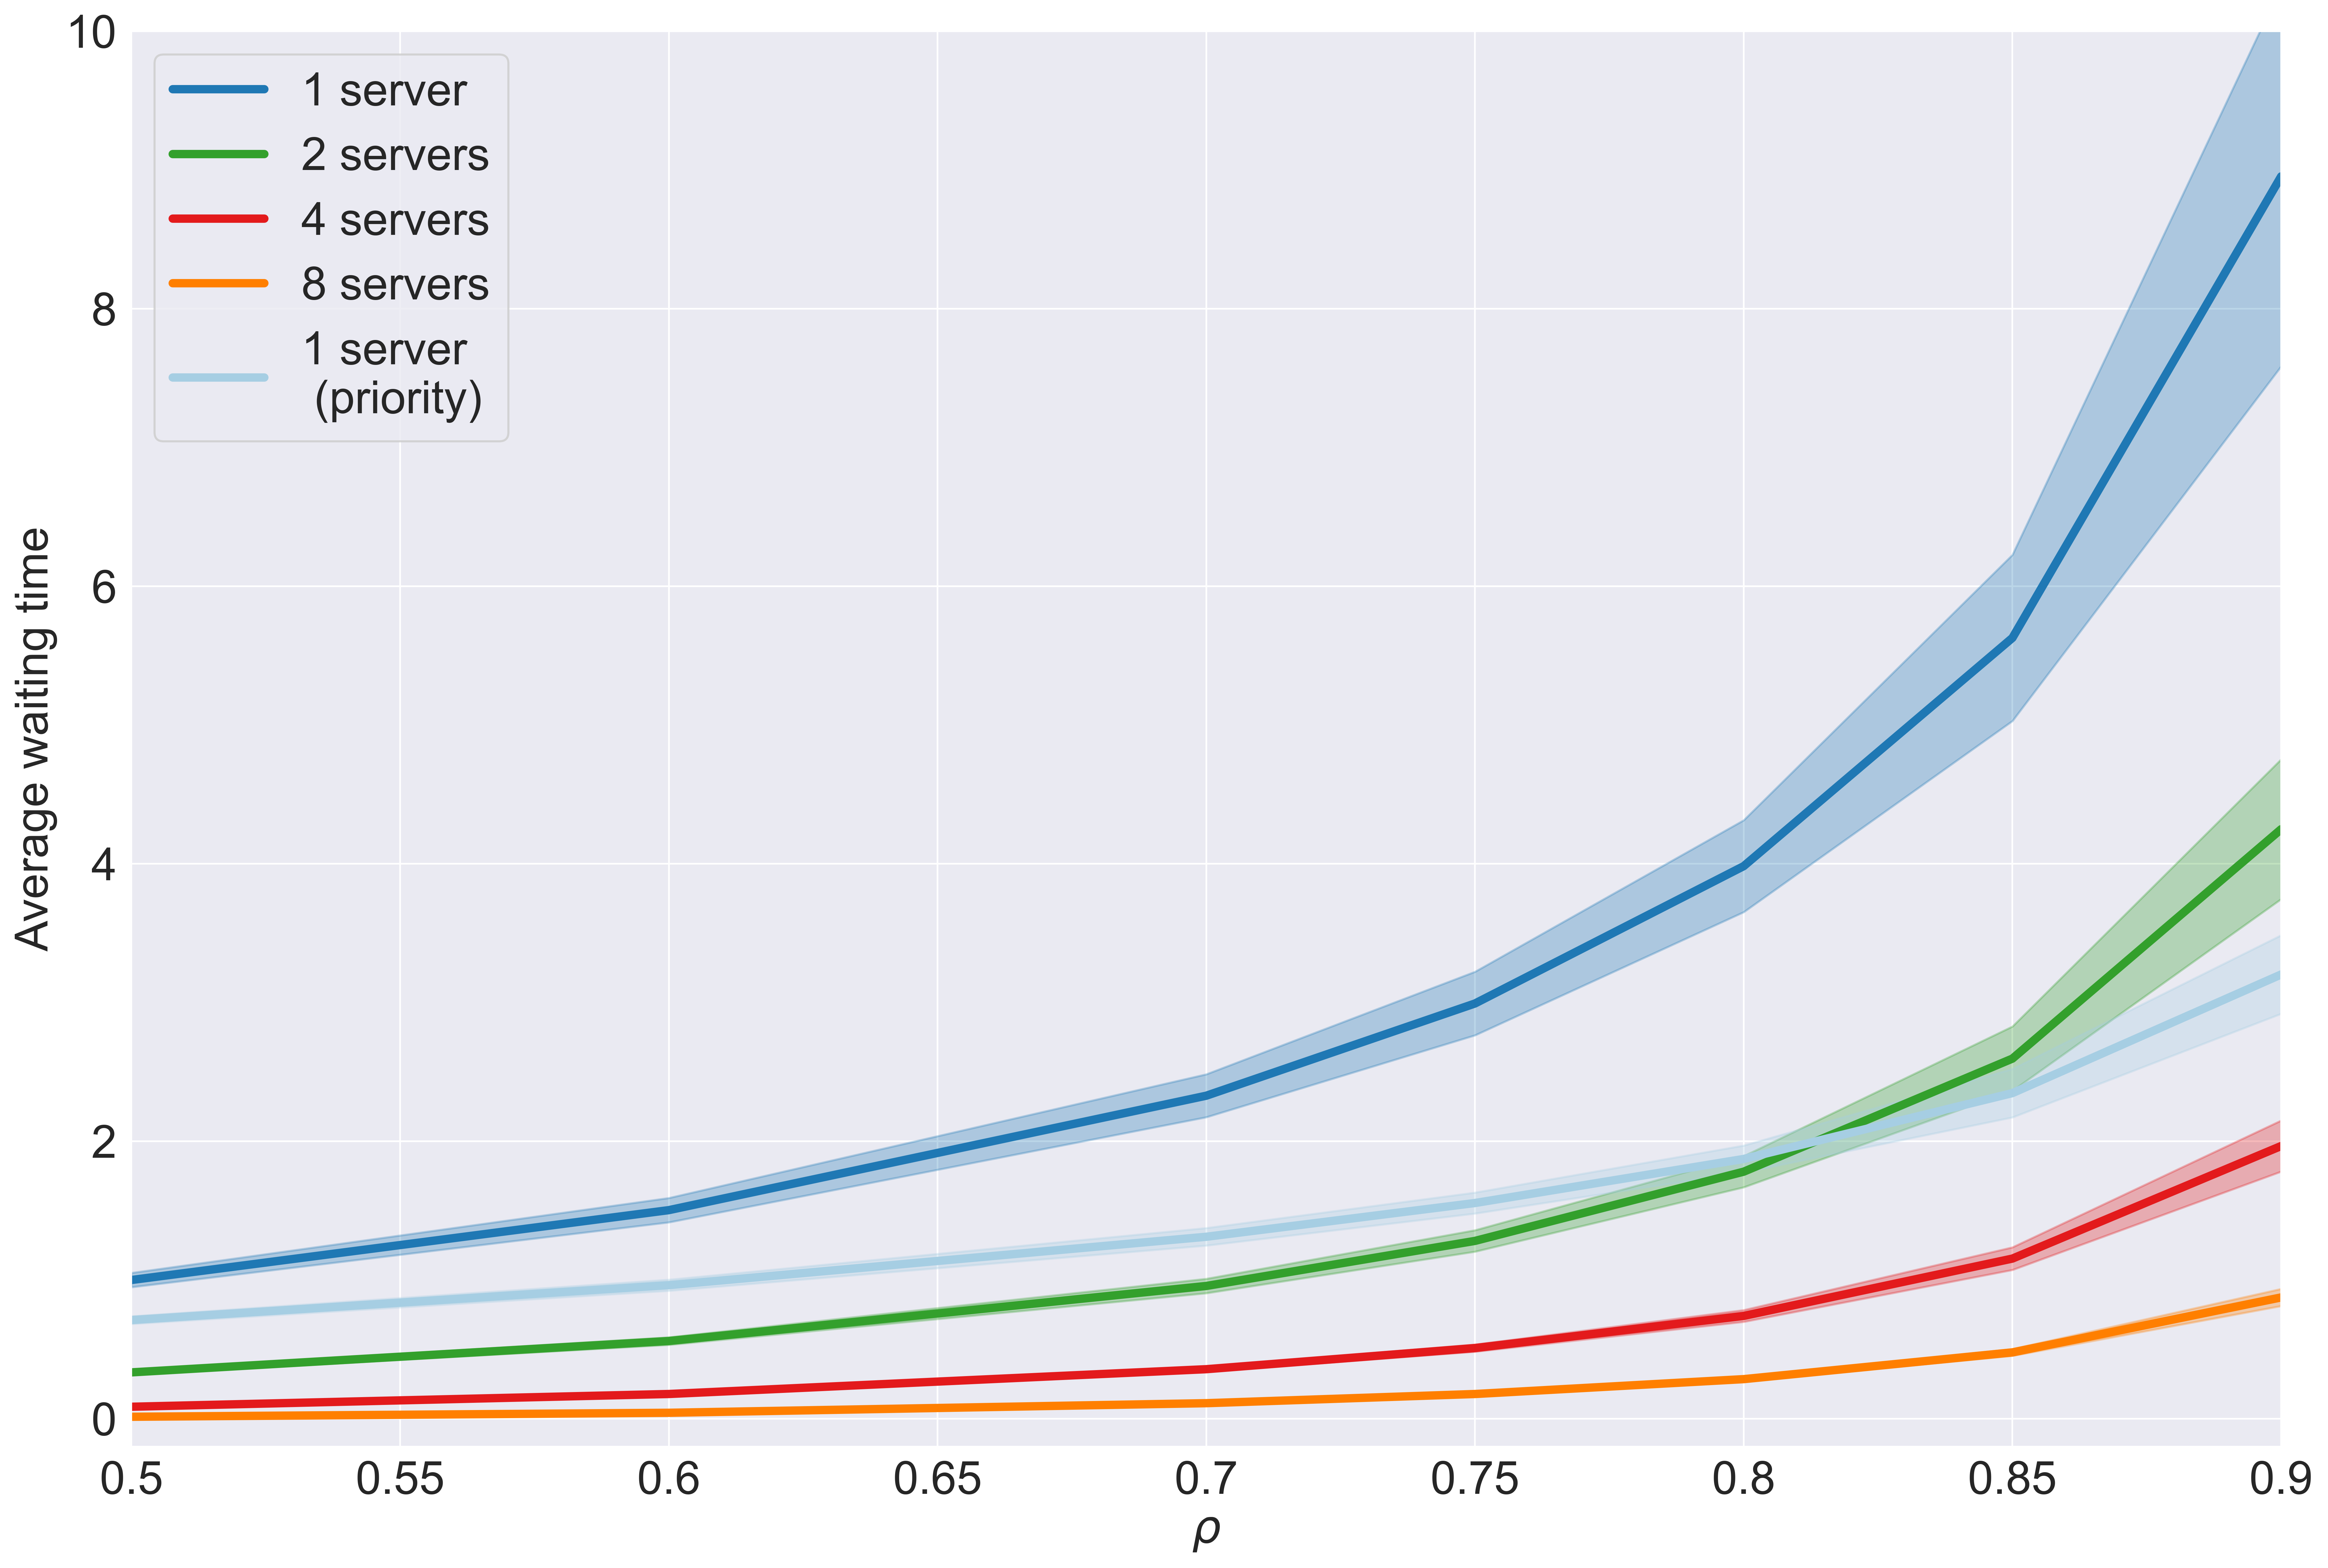

In [9]:
sns.set_style("darkgrid")
rho = [0.5,0.6,0.7,0.75,0.8,0.85,0.9]
servers = [1, 2, 4, 8,'priority']
tstats = []
means = []
stds = []
for n in servers:
    t_loop = []
    mean_loop = []
    std_loop = []
    if n == 'priority':
        for r in rho:
            t, p = stats.ttest_ind(df["('exp', 1, "+str(r)+")"],df["('priority', 1, "+str(r)+")"],equal_var=False)
            t_loop.append(t)
            mean_loop.append(np.mean(df["('priority', 1, "+str(r)+")"]))
            std_loop.append(np.std(df["('priority', 1, "+str(r)+")"]))

    else:
        for r in rho:
            t, p = stats.ttest_ind(df["('exp', 1, "+str(r)+")"],df["('exp', "+str(n)+", "+str(r)+")"],equal_var=False)
            t_loop.append(t)
            mean_loop.append(np.mean(df["('exp', "+str(n)+", "+str(r)+")"]))
            std_loop.append(np.std(df["('exp', "+str(n)+", "+str(r)+")"]))

    tstats.append(t_loop)
    means.append(mean_loop)
    stds.append(std_loop)

print('T-statistic with rho = 0.75, comparing 1 server with and without priority queue: '+str(tstats[4][3]))
print('T-statistic with rho = 0.75, comparing 1 and 2 servers: '+str(tstats[1][3]))
print('T-statistic with rho = 0.75, comparing 1 and 4 servers: '+str(tstats[2][3]))
print('T-statistic with rho = 0.75, comparing 1 and 8 servers: '+str(tstats[3][3]))


print('T-statistic with rho = 0.9, comparing 1 server with and without priority queue: '+str(tstats[4][6]))
print('T-statistic with rho = 0.9, comparing 1 and 2 servers: '+str(tstats[1][6]))
print('T-statistic with rho = 0.9, comparing 1 and 4 servers: '+str(tstats[2][6]))
print('T-statistic with rho = 0.9, comparing 1 and 8 servers: '+str(tstats[3][6]))


#Plot t-stats with increasing rho
fig, axs = plt.subplots(1, figsize=(15,10),dpi=500)
fig.tight_layout()  
axs.plot(rho,tstats[1],color=palette[3],label=r'1 vs. 2 servers',linewidth=4)
axs.plot(rho,tstats[2],color=palette[5],label=r'1 vs. 4 servers',linewidth=4)
axs.plot(rho,tstats[3],color=palette[7],label=r'1 vs. 8 servers',linewidth=4)
axs.plot(rho,tstats[4],color=palette[0],label='Non- vs. priority \n (1 server)',linewidth=4)
axs.plot(rho,np.repeat(stats.t.ppf(0.975,299),len(rho)),color='k',label="$T^{-1}_{299}(0.975)$",linewidth=4)

axs.set_ylabel(r'T-stat', fontsize=22)
axs.set_xlabel(r'$\rho$', fontsize=22)
axs.set_yticks(np.arange(0,360,50))
axs.set_yticklabels(np.round(np.arange(0,360,50)), fontsize=22)
axs.set_xticklabels(np.round(np.arange(0.5,0.95,0.05),2), fontsize=22)
axs.set_xlim((0.5,0.9))
axs.set_ylim((-5,350))
axs.legend(fontsize=22)
plt.show()
fig.savefig(path+'/Figures/servers_tstat.pdf',dpi=300)

#Plot means and std's with increasing rho
fig, axs = plt.subplots(1, figsize=(15,10),dpi=500)
fig.tight_layout()
colorlist = [1,3,5,7,0]
serversname = [1, 2, 4,8,'Priority']
for i in range(5):
    if i == 0:
        axs.plot(rho,means[i],color=palette[colorlist[i]],label=r'{} server'.format(serversname[i]),linewidth=4)
    elif i == 4:
        axs.plot(rho,means[i],color=palette[colorlist[i]],label='1 server \n (priority)'
                 .format(serversname[i]),linewidth=4)
    else:
        axs.plot(rho,means[i],color=palette[colorlist[i]],label=r'{} servers'.format(serversname[i]),linewidth=4)
    errors_pos = [sum(a) for a in zip(*[means[i],2*stds[i]])]
    errors_neg = [sum(a) for a in zip(*[means[i],[-x for x in 2*stds[i]]])]
    axs.fill_between(rho, errors_pos, errors_neg,color=palette[colorlist[i]], alpha=0.3)

axs.set_ylabel(r'Average waiting time', fontsize=22)
axs.set_xlabel(r'$\rho$', fontsize=22)
axs.set_yticks(np.arange(0,11,2))
axs.set_yticklabels(np.round(np.arange(0,11,2)), fontsize=22)
axs.set_xticklabels(np.round(np.arange(0.5,0.95,0.05),2), fontsize=22)
axs.set_xlim((0.5,0.9))
axs.set_ylim((-0.2,10))
axs.legend(fontsize=22)
plt.show()
fig.savefig(path+'/Figures/servers_meanstd.pdf',dpi=300)



#### 3. Explore other distributions, n in [1,2] and with varying $\lambda$ 

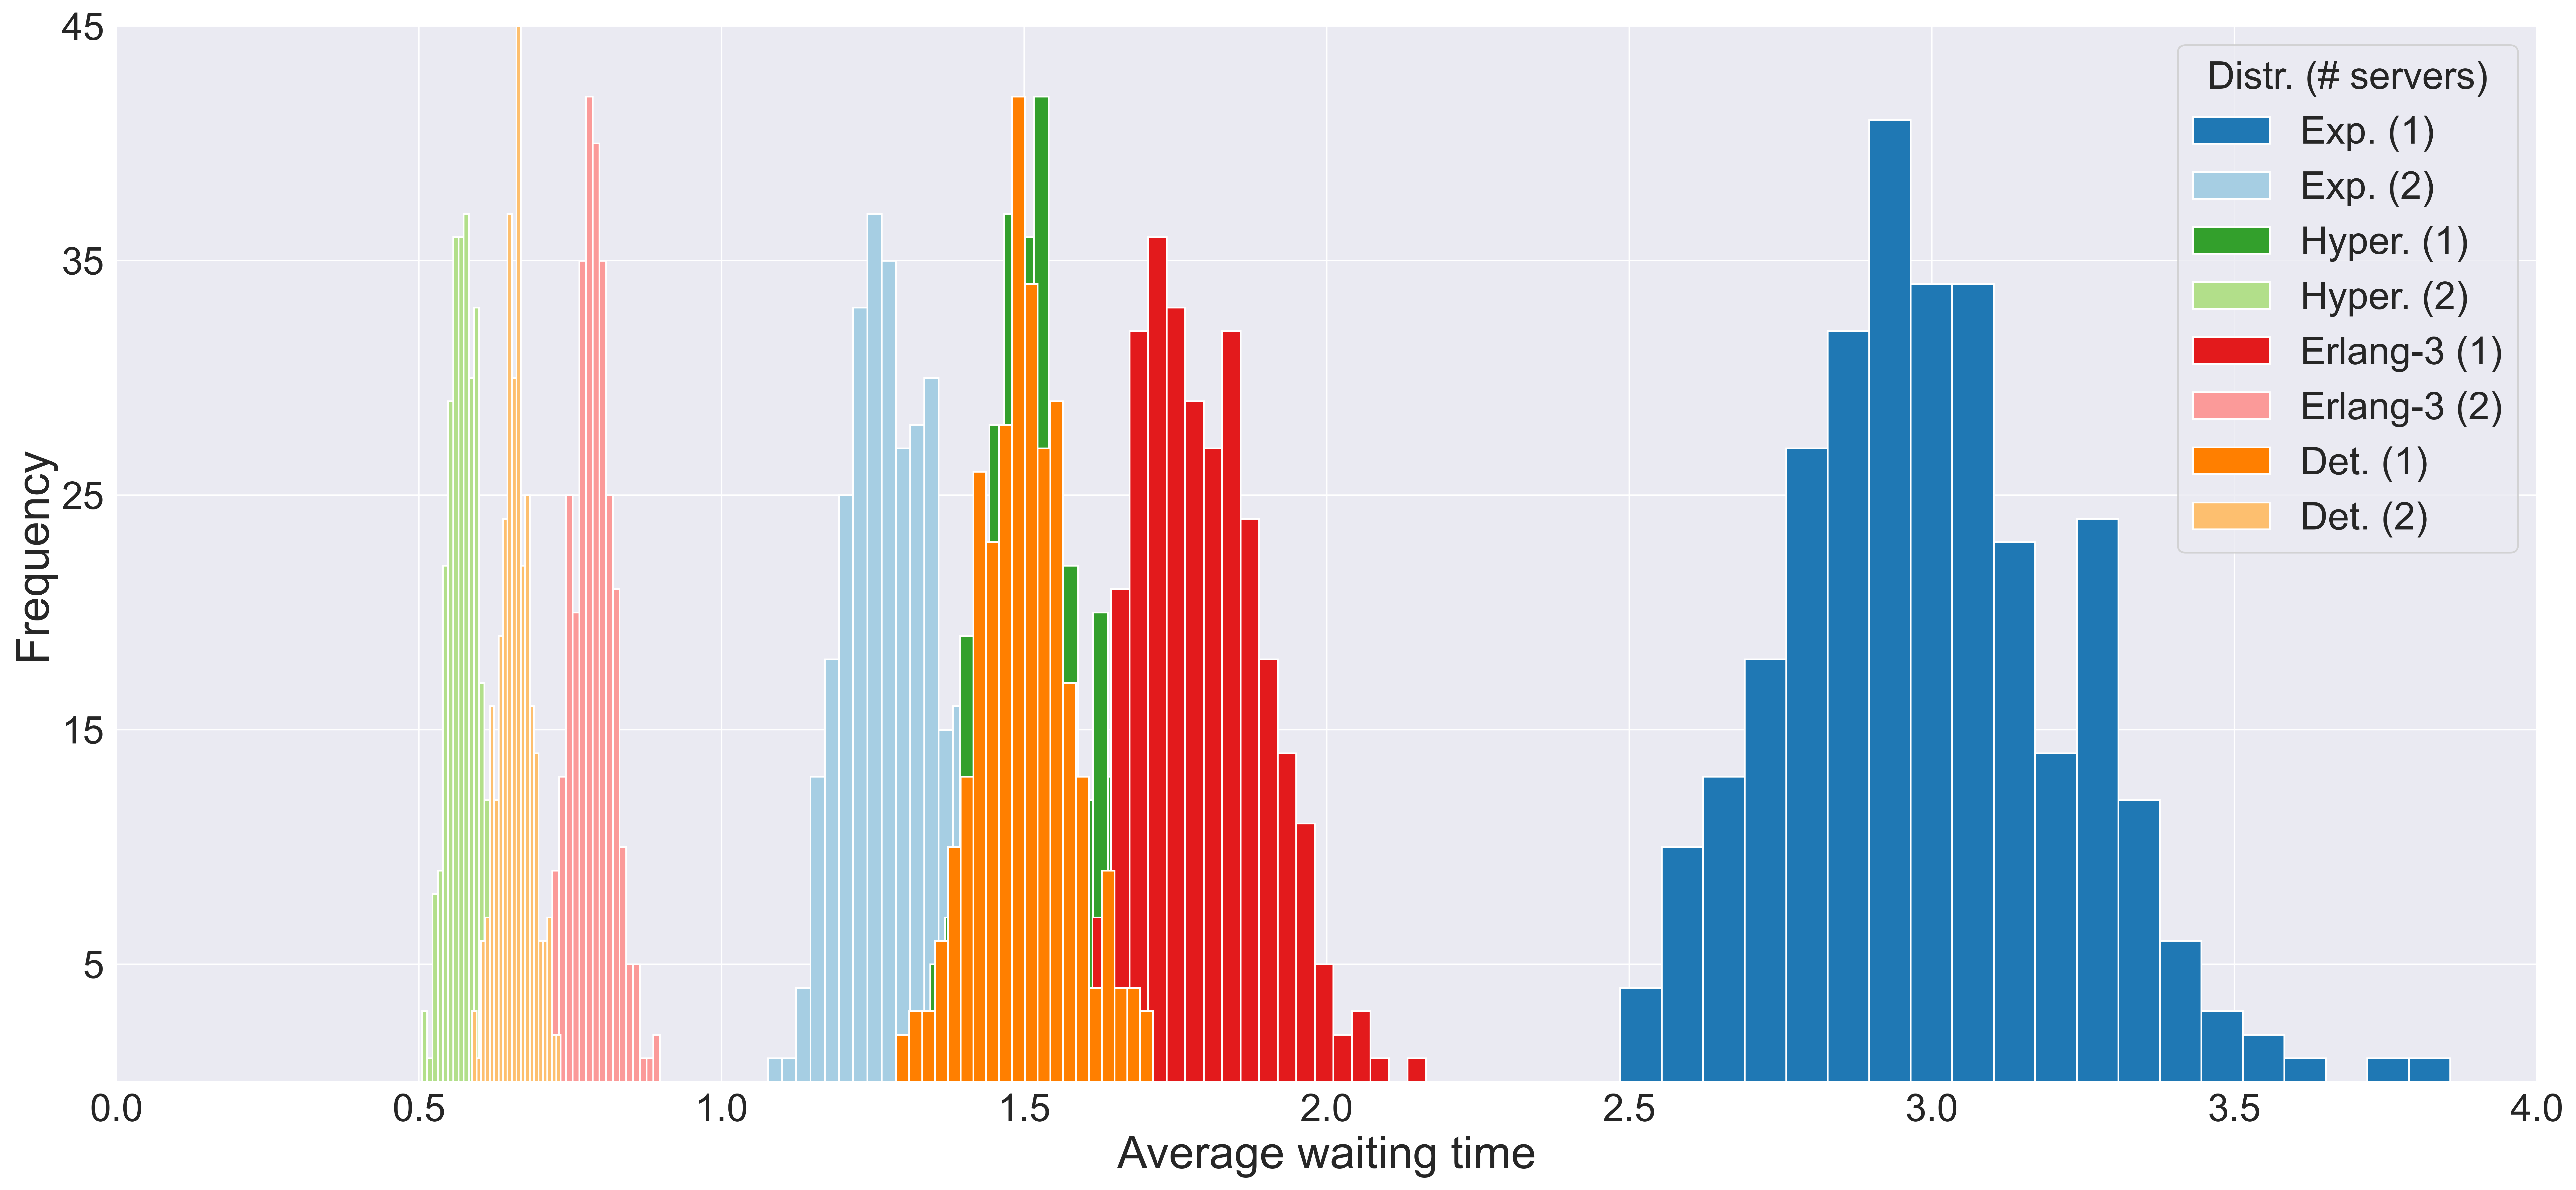

In [4]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(1, figsize=(20,9),dpi=500)
fig.tight_layout()     

#Plot histograms
axs.hist(df["('exp', 1, 0.75)"],bins=20,color=palette[1],label='Exp. (1)')
axs.hist(df["('exp', 2, 0.75)"],bins=20,color=palette[0],label='Exp. (2)')
axs.hist(df["('hyperexp', 1, 0.75)"],bins=20,color=palette[3],label='Hyper. (1)')
axs.hist(df["('hyperexp', 2, 0.75)"],bins=20,color=palette[2],label='Hyper. (2)')
axs.hist(df["('erlang', 1, 0.75)"],bins=20,color=palette[5],label='Erlang-3 (1)')
axs.hist(df["('erlang', 2, 0.75)"],bins=20,color=palette[4],label='Erlang-3 (2)')
axs.hist(df["('deterministic', 1, 0.75)"],bins=20,color=palette[7],label='Det. (1)')
axs.hist(df["('deterministic', 2, 0.75)"],bins=20,color=palette[6],label='Det. (2)')

#Edit axis and labels etc.
axs.set_xlabel(r'Average waiting time', fontsize=26)
axs.set_ylabel(r'Frequency', fontsize=26)
axs.set_yticks(np.arange(5,50,10))
axs.set_yticklabels(np.round(np.arange(5,50,10)), fontsize=22)
axs.set_xticklabels(np.arange(0,5,0.5), fontsize=22)
axs.set_xlim((0,4))
axs.set_ylim((0,45))


axs.legend(fontsize=22,loc='upper right',ncol=1,title ='Distr. (# servers)',title_fontsize=22)
plt.show()
fig.savefig(path+'/Figures/distr_hist.pdf',dpi=300)


#### 4. Again plot t-statistic testing between 1 and 2 servers for every distribution
Also test for some similar peaks from graph above, and show mean (leave std for clarity).

Critical value to compare to (also plotted): 1.9679296690653618

T-statistic with rho = 0.75, comparing 1 and 2 servers, exponential distribution: 122.43540211258151
T-statistic with rho = 0.75, comparing 1 and 2 servers, hyperexponential distribution: 182.80864265121565
T-statistic with rho = 0.75, comparing 1 and 2 servers, erlang-3 distribution: 162.01490131903503
T-statistic with rho = 0.75, comparing 1 and 2 servers, deterministic: 180.60076220252796

We see that the peaks of hyperexponential and deterministic distributions are pretty close for both n.
Test for a difference between these distributions and still find significant difference below.

T-statistic with rho = 0.75, comparing hyperexponential and deterministic (1 server): 3.433478861219076
T-statistic with rho = 0.75, comparing hyperexponential and deterministic (1 server): 36.67772419374544

T-statistic with rho = 0.9, comparing 1 and 2 servers, exponential distribution: 55.77388865541657
T-statistic with rho = 0.9, comp

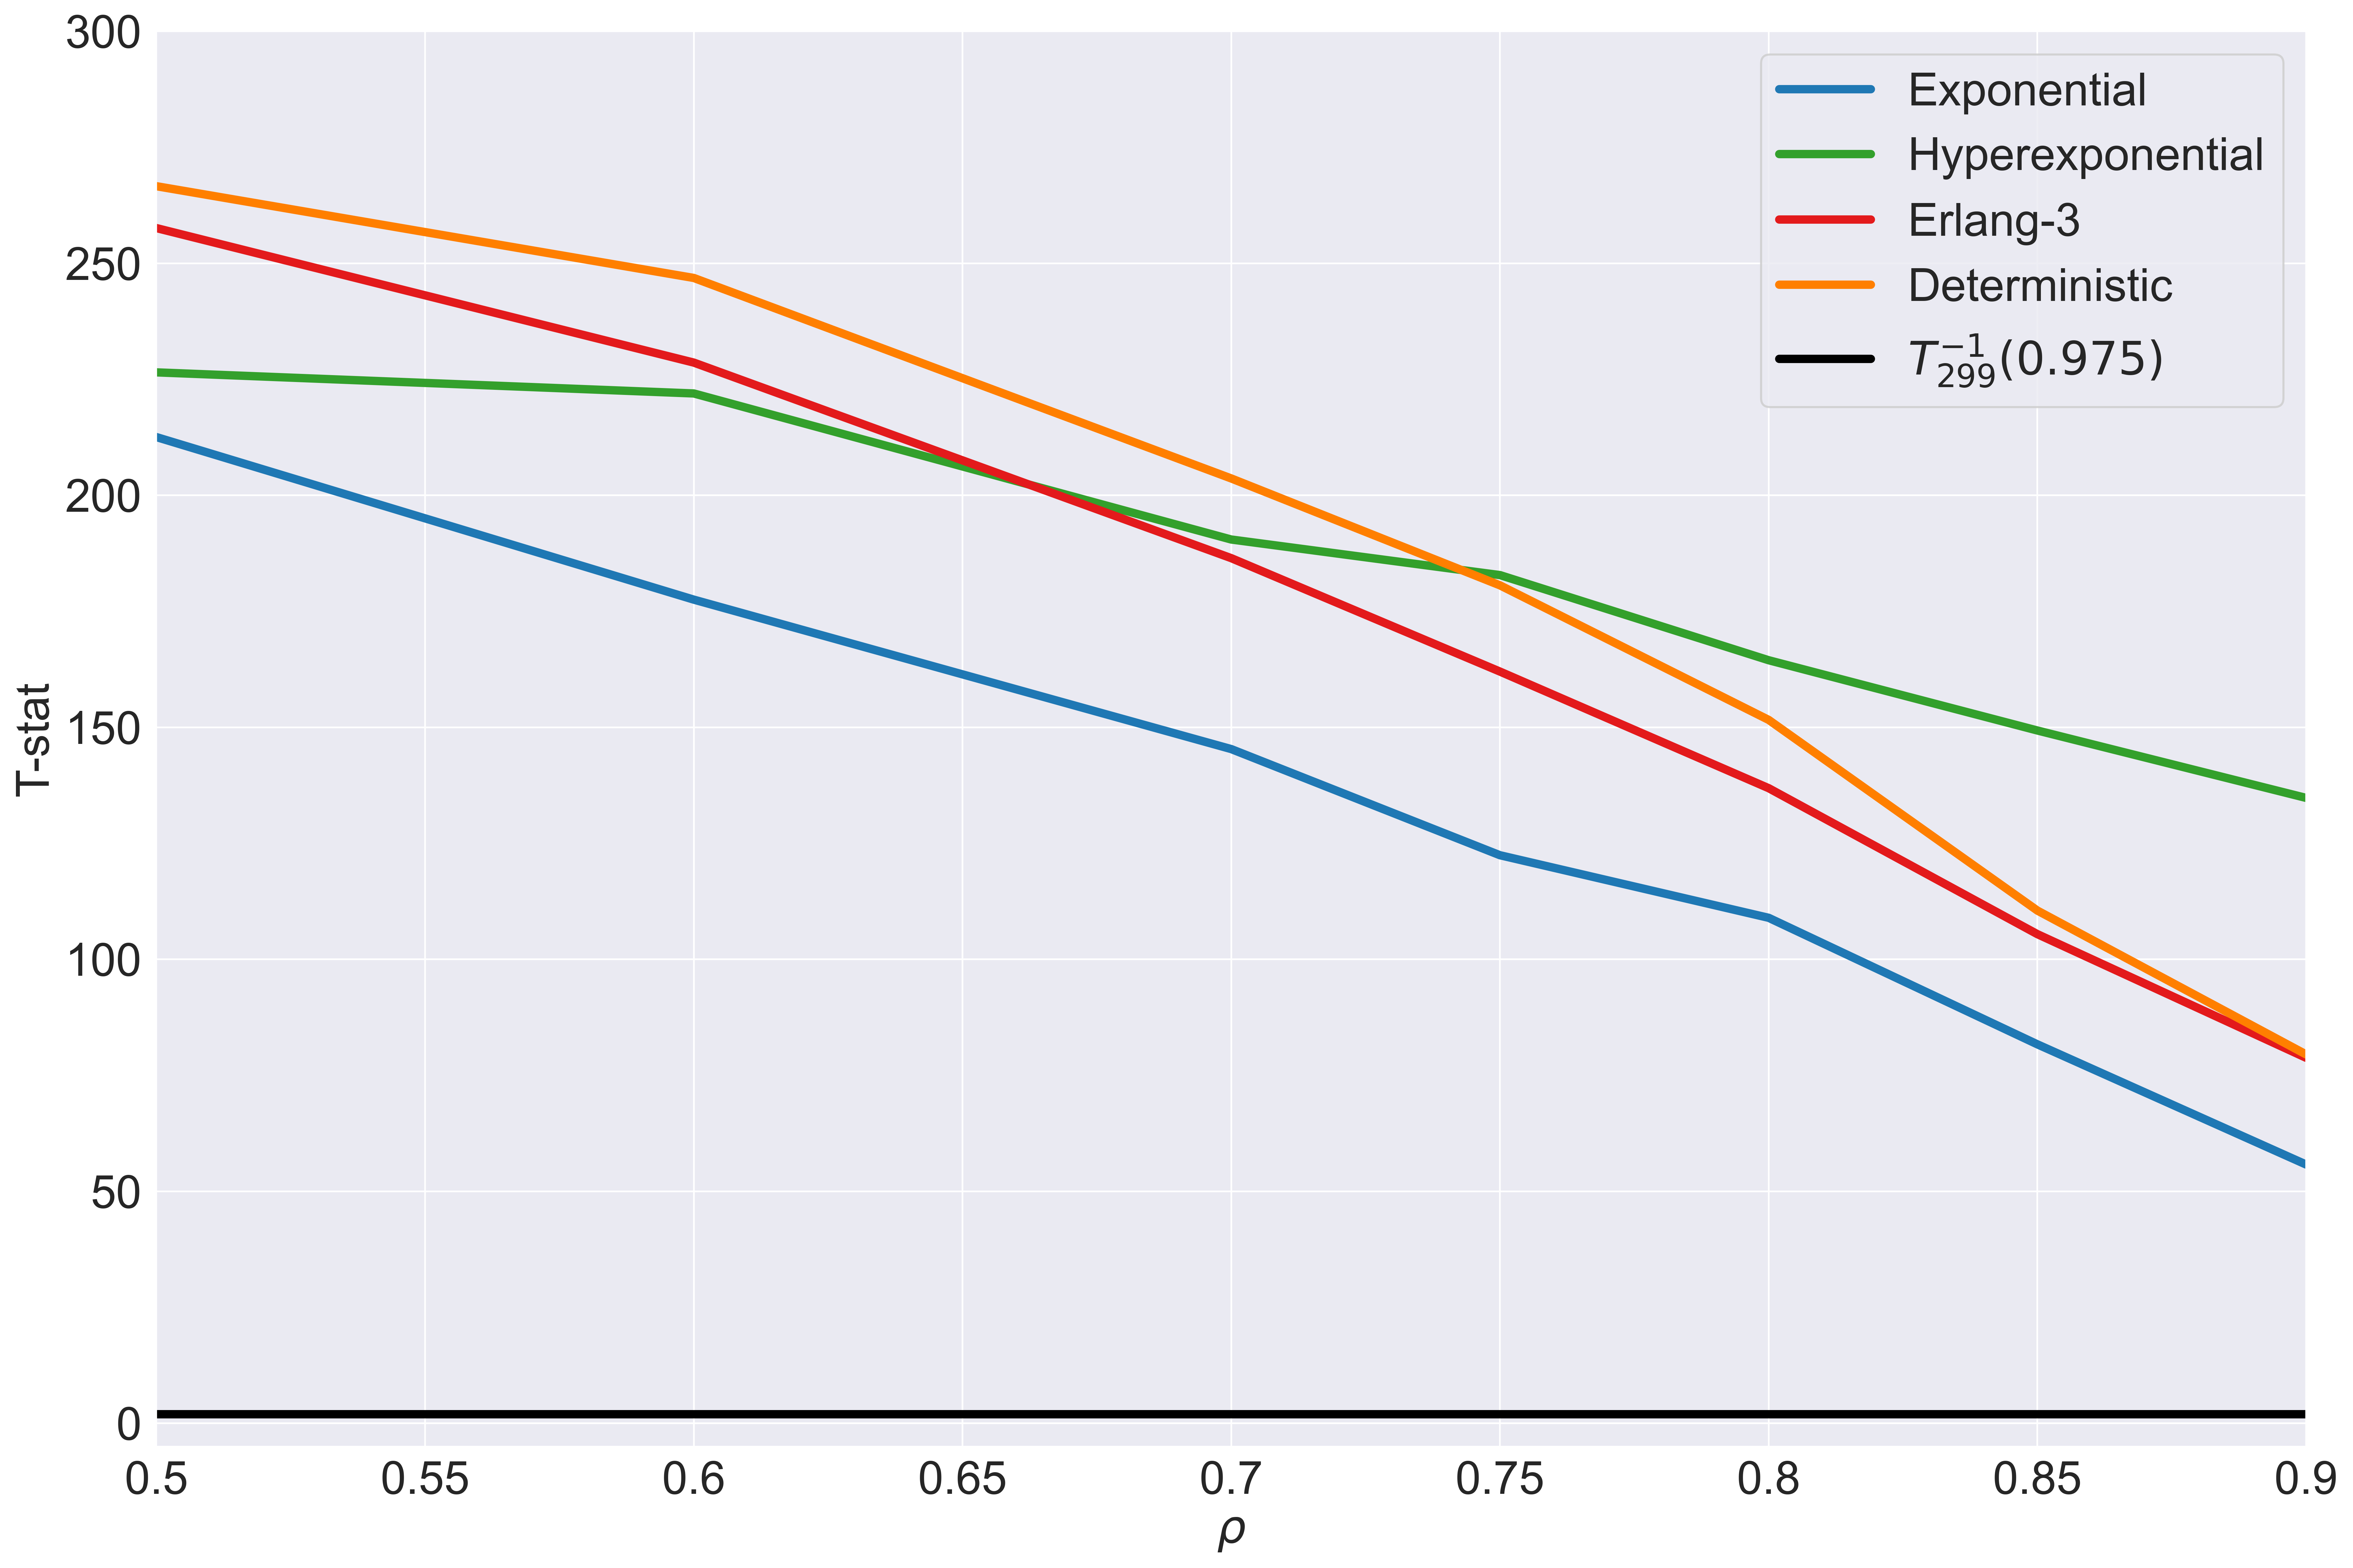

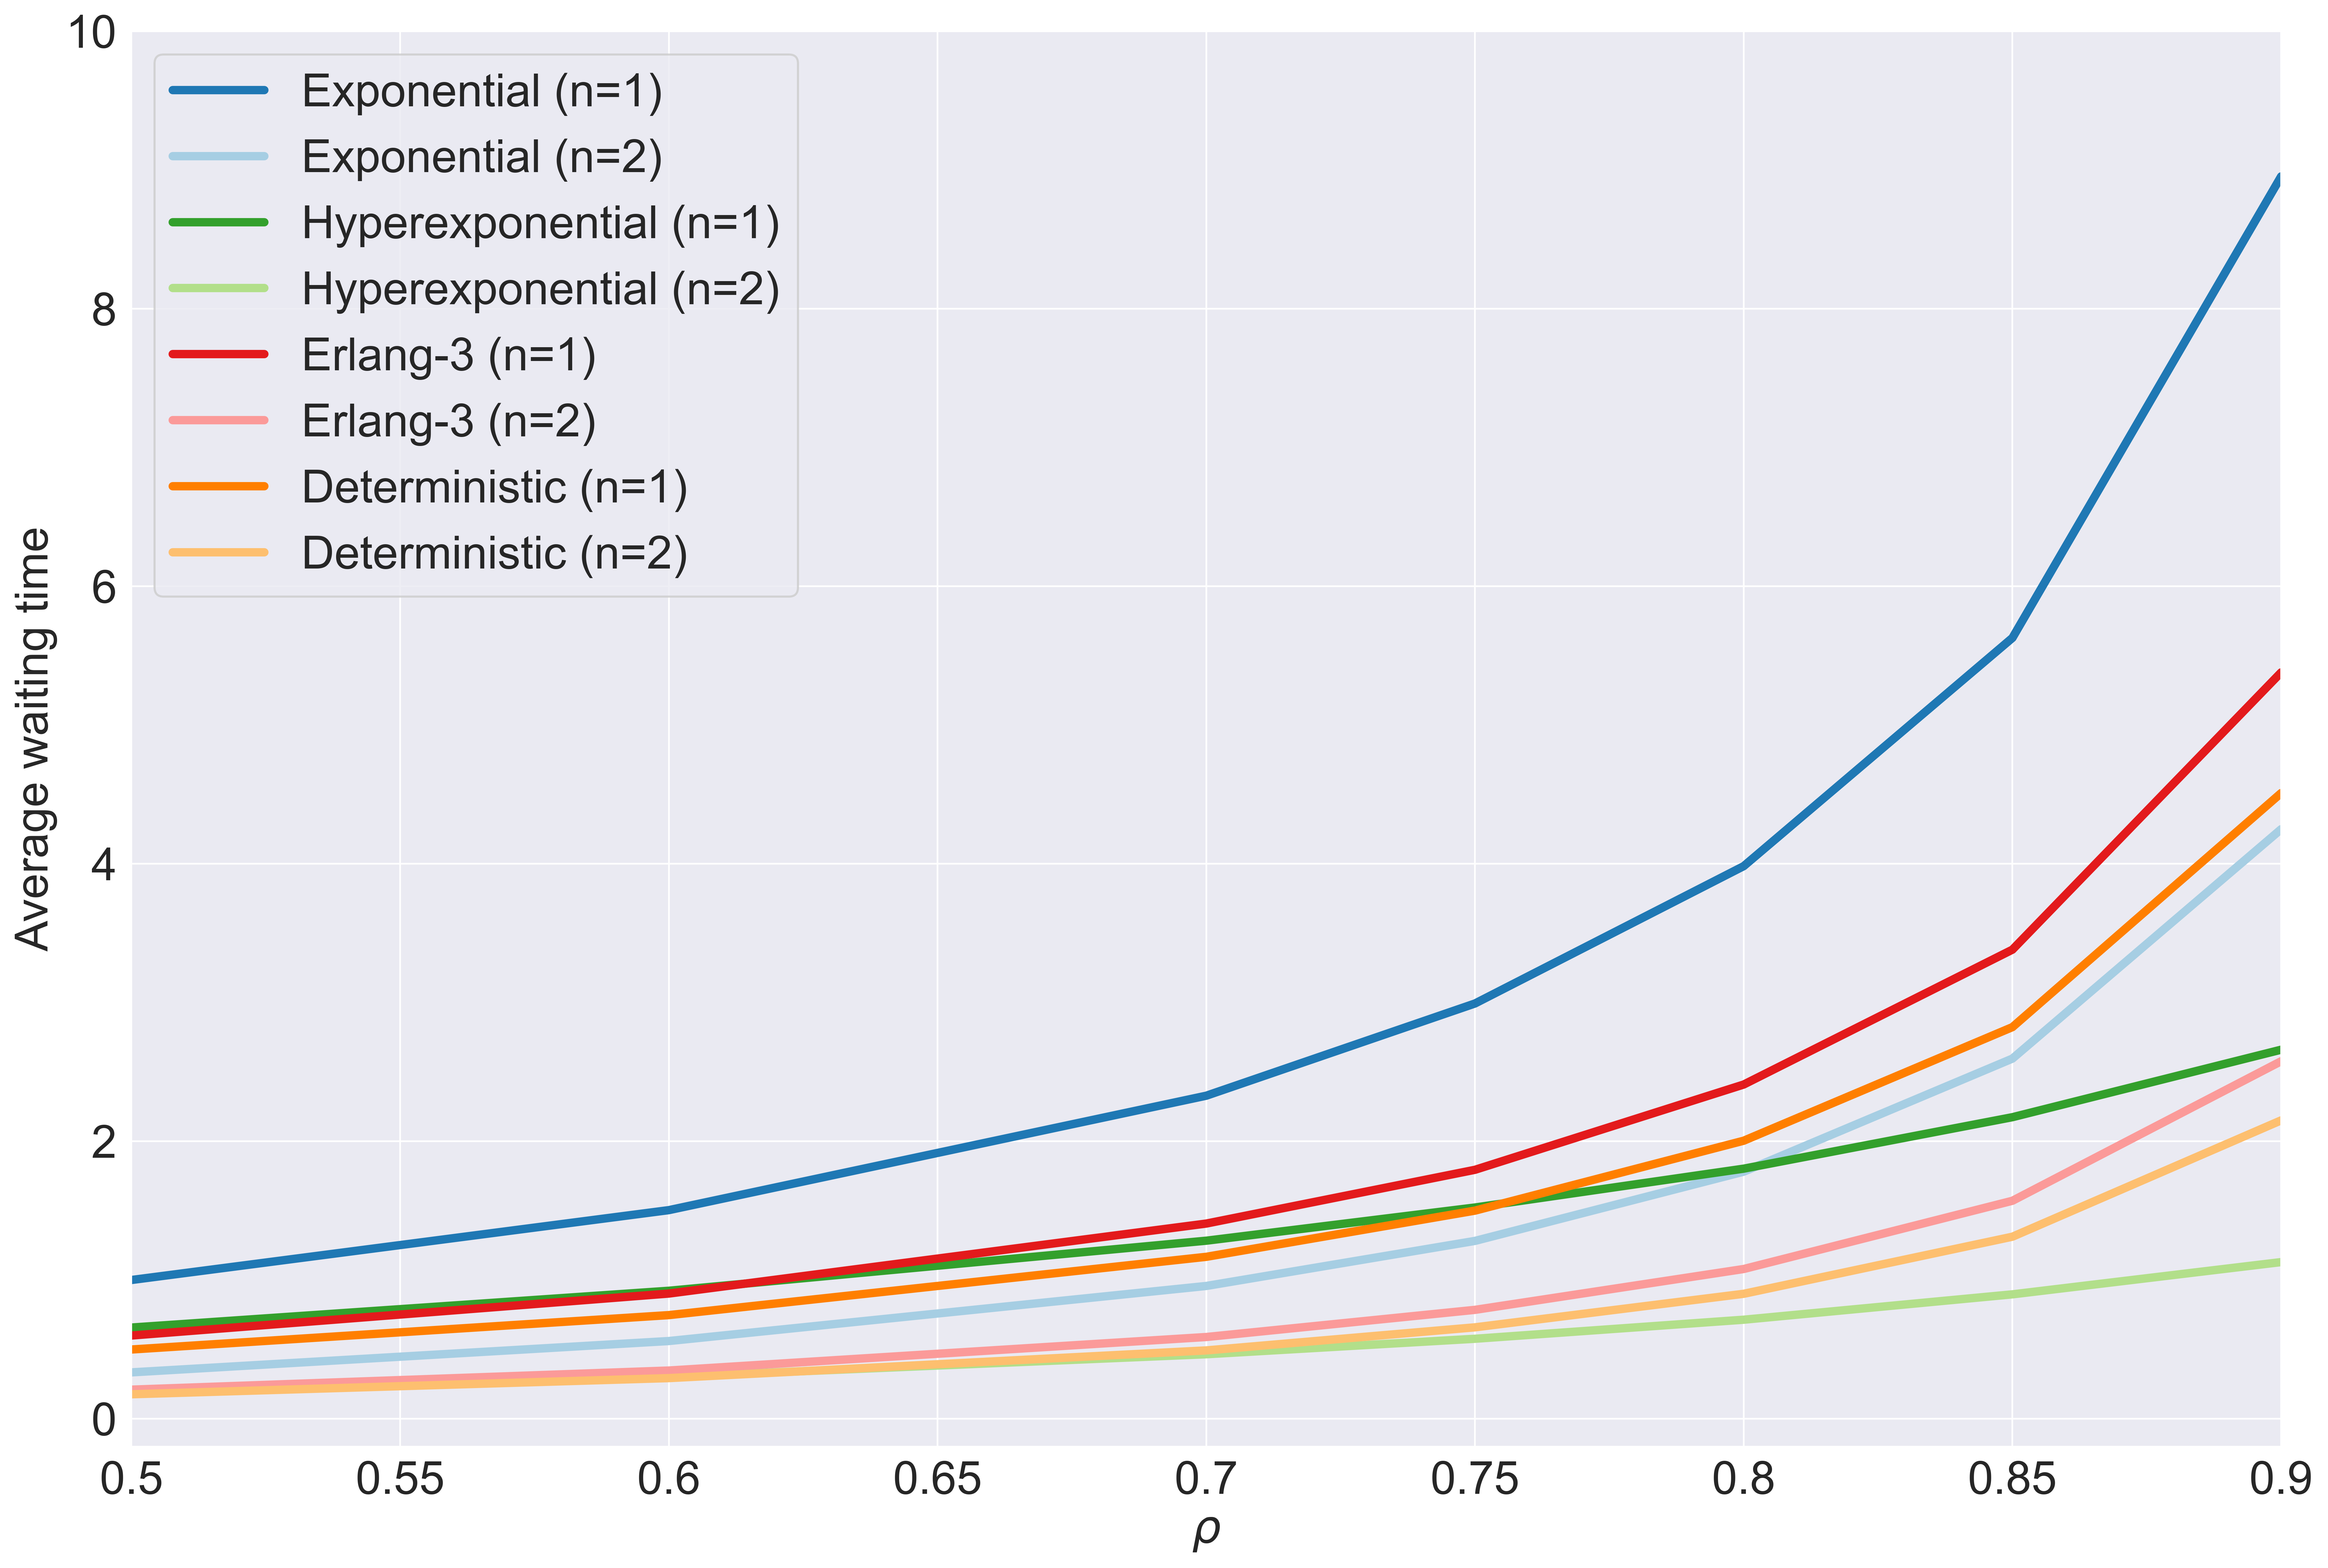

In [6]:
sns.set_style("darkgrid")
rho = [0.5,0.6,0.7,0.75,0.8,0.85,0.9]
servers = [1,2]
dist = ['exp','hyperexp','erlang','deterministic']
tstats = []
means = []
stds = []
for d in dist:
    for n in servers:
        t_loop = []
        mean_loop = []
        std_loop = []
        for r in rho:
            t, p = stats.ttest_ind(df["('"+str(d)+"', 1, "+str(r)+")"],df["('"+str(d)+"', 2, "+str(r)+")"],equal_var=False)
            t_loop.append(t)
            mean_loop.append(np.mean(df["('"+str(d)+"', "+str(n)+", "+str(r)+")"]))
            std_loop.append(np.std(df["('"+str(d)+"', "+str(n)+", "+str(r)+")"]))
        means.append(mean_loop)
        stds.append(std_loop)
    tstats.append(t_loop)
    
print('Critical value to compare to (also plotted): '+str(stats.t.ppf(0.975,299)))

print('\nT-statistic with rho = 0.75, comparing 1 and 2 servers, exponential distribution: '+str(tstats[0][3]))
print('T-statistic with rho = 0.75, comparing 1 and 2 servers, hyperexponential distribution: '+str(tstats[1][3]))
print('T-statistic with rho = 0.75, comparing 1 and 2 servers, erlang-3 distribution: '+str(tstats[2][3]))
print('T-statistic with rho = 0.75, comparing 1 and 2 servers, deterministic: '+str(tstats[3][3]))
print('\nWe see that the peaks of hyperexponential and deterministic distributions are pretty close for both n.')
print('Test for a difference between these distributions and still find significant difference below.\n')

t_extra = stats.ttest_ind(df["('hyperexp', 1, 0.75)"],df["('deterministic', 1, 0.75)"],equal_var=False)[0]
print('T-statistic with rho = 0.75, comparing hyperexponential and deterministic (1 server): '+str(t_extra))
t_extra = stats.ttest_ind(df["('deterministic', 2, 0.75)"],df["('hyperexp', 2, 0.75)"],equal_var=False)[0]
print('T-statistic with rho = 0.75, comparing hyperexponential and deterministic (1 server): '+str(t_extra))

print('\nT-statistic with rho = 0.9, comparing 1 and 2 servers, exponential distribution: '+str(tstats[0][6]))
print('T-statistic with rho = 0.9, comparing 1 and 2 servers, hyperexponential distribution: '+str(tstats[1][6]))
print('T-statistic with rho = 0.9, comparing 1 and 2 servers, erlang-3 distribution: '+str(tstats[2][6]))
print('T-statistic with rho = 0.9, comparing 1 and 2 servers, deterministic: '+str(tstats[3][6]))

#Plot tstats with increasing rho
fig, axs = plt.subplots(1, figsize=(15,10),dpi=500)
fig.tight_layout()  
axs.plot(rho,tstats[0],color=palette[1],label=r'Exponential',linewidth=4)
axs.plot(rho,tstats[1],color=palette[3],label=r'Hyperexponential',linewidth=4)
axs.plot(rho,tstats[2],color=palette[5],label=r'Erlang-3',linewidth=4)
axs.plot(rho,tstats[3],color=palette[7],label=r'Deterministic',linewidth=4)
axs.plot(rho,np.repeat(stats.t.ppf(0.975,299),len(rho)),color='k',label="$T^{-1}_{299}(0.975)$",linewidth=4)

axs.set_ylabel(r'T-stat', fontsize=22)
axs.set_xlabel(r'$\rho$', fontsize=22)
axs.set_yticks(np.arange(0,310,50))
axs.set_yticklabels(np.round(np.arange(0,310,50)), fontsize=22)
axs.set_xticklabels(np.round(np.arange(0.5,0.95,0.05),2), fontsize=22)
axs.set_xlim((0.5,0.9))
axs.set_ylim((-5,300))
axs.legend(fontsize=22)
plt.show()
fig.savefig(path+'/Figures/distr_tstat.pdf',dpi=300)


#Plot means and std's with increasing rho
fig, axs = plt.subplots(1, figsize=(15,10),dpi=500)
fig.tight_layout()
distnames = ['Exponential','Hyperexponential','Erlang-3','Deterministic']

for i in range(4):
    for n in range(2):
        if n == 0:
            axs.plot(rho,means[2*i],color=palette[2*i+1],label=r'{} (n=1)'.format(distnames[i]),linewidth=4)
            errors_pos = [sum(a) for a in zip(*[means[2*i],2*stds[2*i]])]
            errors_neg = [sum(a) for a in zip(*[means[2*i],[-x for x in 2*stds[2*i]]])]
#             axs.fill_between(rho, errors_pos, errors_neg,color=palette[2*i+1], alpha=0.3)

        else:
            axs.plot(rho,means[2*i+1],color=palette[2*i],label=r'{} (n=2)'.format(distnames[i]),linewidth=4)
            errors_pos = [sum(a) for a in zip(*[means[2*i+1],2*stds[2*i+1]])]
            errors_neg = [sum(a) for a in zip(*[means[2*i+1],[-x for x in 2*stds[2*i+1]]])]
#             axs.fill_between(rho, errors_pos, errors_neg,color=palette[2*i], alpha=0.3)

axs.set_ylabel(r'Average waiting time', fontsize=22)
axs.set_xlabel(r'$\rho$', fontsize=22)
axs.set_yticks(np.arange(0,11,2))
axs.set_yticklabels(np.round(np.arange(0,11,2)), fontsize=22)
axs.set_xticklabels(np.round(np.arange(0.5,0.95,0.05),2), fontsize=22)
axs.set_xlim((0.5,0.9))
axs.set_ylim((-0.2,10))
axs.legend(fontsize=22)
plt.show()
fig.savefig(path+'/Figures/distr_meanstd.pdf',dpi=300)
